In [15]:
import librosa
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [16]:
"""Imported Packages that we needed for this task"""

'Imported Packages that we needed for this task'

## Load samples using librosa

In [17]:
"""Loaded 2 samples of knocking sound"""

'Loaded 2 samples of knocking sound'

In [18]:
y1, sr1 = librosa.load("knock_sounds/test_knock1.mp3")

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [19]:
y2, sr2 = librosa.load("knock_sounds/test_kcock3.mp3")

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


## Plot samples

In [20]:
"""Plotted waveplots for each sample"""

'Plotted waveplots for each sample'

In [21]:
from librosa.display import waveplot

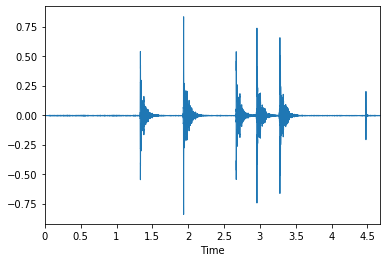

In [22]:
waveplot(y1)

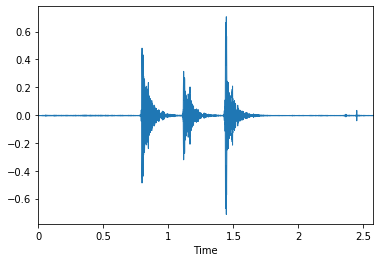

In [23]:
waveplot(y2)

## Applied FFT and cheked using speerman korrelation

In [24]:
"""Applied fourier transform ro each sound sample,
and compared them using spearman's correlation test, to see if knock patterns do match"""

"Applied fourier transform ro each sound sample,\nand compared them using spearman's correlation test, to see if knock patterns do match"

In [25]:
a1 = np.fft.fft(y1)

In [26]:
a1.shape

(103008,)

In [27]:
a2 = np.fft.fft(y2)

In [28]:
a2.shape

(56832,)

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([8.000e+00, 2.700e+01, 1.420e+02, 1.068e+03, 9.948e+04, 1.990e+03,
        2.550e+02, 3.200e+01, 4.000e+00, 2.000e+00]),
 array([-143.97784 -105.82895j , -112.79661  -84.58039j ,
         -81.61537  -63.33184j ,  -50.43414  -42.083282j,
         -19.252905 -20.834728j,   11.928329  +0.413826j,
          43.109566 +21.66238j ,   74.2908   +42.910934j,
         105.47203  +64.15949j ,  136.65327  +85.40804j ,
         167.8345  +106.6566j  ], dtype=complex64),
 <a list of 10 Patch objects>)

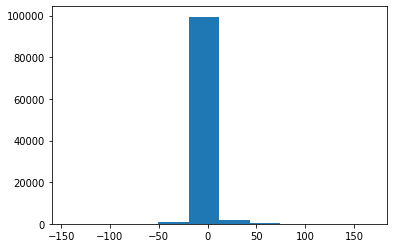

In [29]:
plt.hist(a1)

(array([6.0000e+00, 8.0000e+00, 4.6000e+01, 3.4400e+02, 5.4858e+04,
        1.3800e+03, 1.6000e+02, 1.8000e+01, 1.0000e+01, 2.0000e+00]),
 array([-152.48776  -67.60065j  , -120.59507  -60.463245j ,
         -88.70238  -53.32584j  ,  -56.809685 -46.18844j  ,
         -24.916992 -39.051037j ,    6.9757004-31.913633j ,
          38.868393 -24.776232j ,   70.761086 -17.638828j ,
         102.65378  -10.501426j ,  134.54648   -3.3640232j,
         166.43916   +3.7733793j], dtype=complex64),
 <a list of 10 Patch objects>)

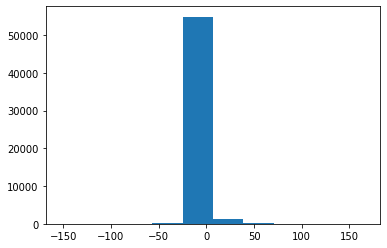

In [30]:
plt.hist(a2)

In [31]:
spearmanr(a1[0:min(len(y1), len(y2))], a2[0:min(len(y1), len(y2))])

SpearmanrResult(correlation=-0.0017253153806425566, pvalue=0.6808546351841607)

## PCA, UMAP, TSNE on sound samples

In [32]:
"""Test(not needed in the task)"""

'Test(not needed in the task)'

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [34]:
mfcc1 = librosa.feature.mfcc(y1[0:min(len(y1), len(y2))])
mfcc2 = librosa.feature.mfcc(y2[0:min(len(y1), len(y2))])

In [35]:
mfccs = np.concatenate((mfcc1, mfcc2), axis=0)

In [36]:
mfccs.shape

(40, 112)

In [37]:
labels = np.concatenate((np.zeros(20), np.ones(20)), axis=0)

In [38]:
tsne = TSNE(2, verbose=True)
projected = tsne.fit_transform(mfccs, labels)

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.000s...
[t-SNE] Computed neighbors for 40 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 48.397869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.792652
[t-SNE] KL divergence after 1000 iterations: 0.400631


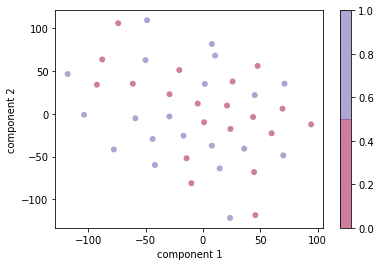

In [39]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', cmap=plt.cm.get_cmap('Spectral', 2), alpha=.5)

plt.xlabel("component 1")
plt.ylabel("component 2")

plt.colorbar()
plt.show()

## Male/Female voice clustering

In [40]:
"""Loaded sound sample 3 male/ 3 female"""

'Loaded sound sample 3 male/ 3 female'

In [41]:
male1, sr1 = librosa.load("egor.mp3")
male2, sr2 = librosa.load("oleg.mp3")
male3, sr3 = librosa.load("misha.mp3")
female1, sr4 = librosa.load("nst1.mp3")
female2, sr5 = librosa.load("nst2.mp3")
female3, sr6 = librosa.load("nst3.mp3")


/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

In [75]:
"""Plotted each sample and extracted features of it into the feature vector"""

'Plotted each sample and extracted features of it into the feature vector'

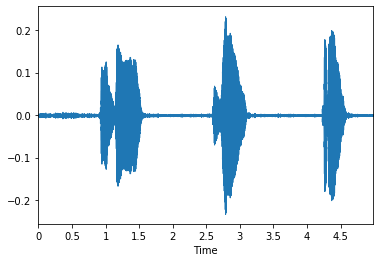

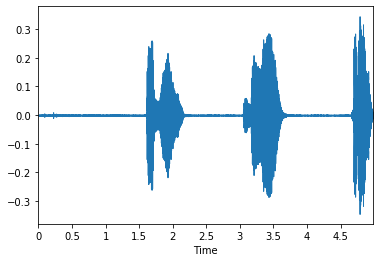

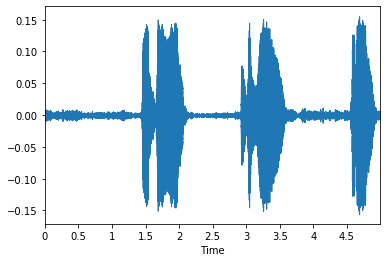

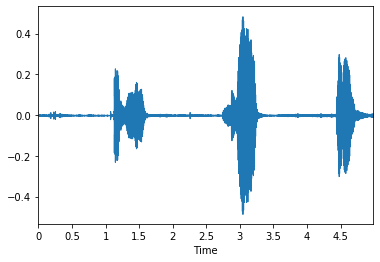

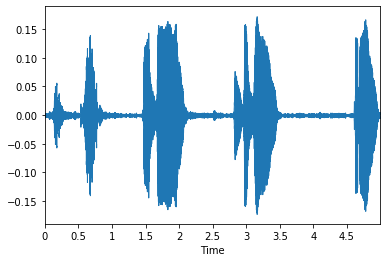

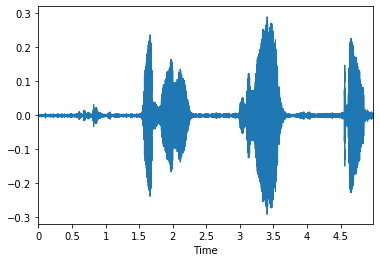

In [58]:
sounds = [female1, male1, female2, male2, female3, male3]
feats = []
for i in sounds:
    waveplot(i[:110000])
    plt.show()
    feats.append(librosa.feature.mfcc(i[:110000]))

In [59]:
np.array(feats).shape

(6, 20, 215)

In [60]:
feats = np.concatenate(feats, axis=0)

In [61]:
feats.shape

(120, 215)

In [62]:
labels = []

In [63]:
for i in range(3):
    for j in range(20):
        labels.append(0)
    for j in range(20):
        labels.append(1)

### 2D TSNE

In [76]:
"""Applied 2d TSNE, and plotted the result"""

'Applied 2d TSNE'

In [64]:
tsne = TSNE(2, verbose=True)
projected = tsne.fit_transform(feats, np.array(labels))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 79.939449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.604549
[t-SNE] KL divergence after 1000 iterations: 0.391200


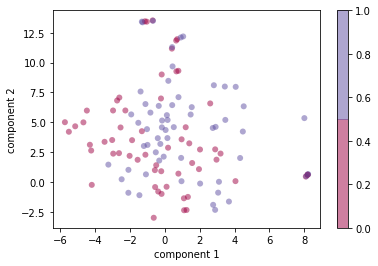

In [65]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', cmap=plt.cm.get_cmap('Spectral', 2), alpha=.5)

plt.xlabel("component 1")
plt.ylabel("component 2")

plt.colorbar()
plt.show()

In [66]:
type(projected)

numpy.ndarray

### 2D PCA

In [ ]:
"""Applied 2d PCA, and plotted the result"""

In [67]:
pca = PCA(2)
projected2 = pca.fit_transform(feats, labels)

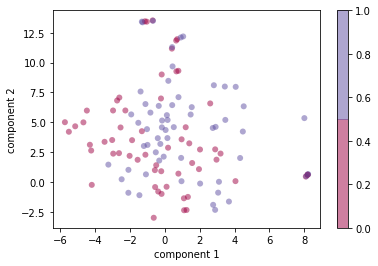

In [68]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', cmap=plt.cm.get_cmap('Spectral', 2), alpha=.5)

plt.xlabel("component 1")
plt.ylabel("component 2")

plt.colorbar()
plt.show()

In [69]:
pca = PCA(3)
projected3 = pca.fit_transform(feats, labels)

In [70]:
from mpl_toolkits.mplot3d import Axes3D
projected3.shape

(120, 3)

### 3D PCA

In [ ]:
"""Applied 3d PCA, and plotted the result"""

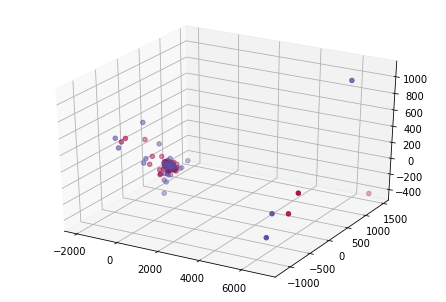

In [71]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(projected3[:, 0], projected3[:, 1], projected3[:, 2], c=labels, cmap=plt.cm.get_cmap('Spectral', 10))


### 3D TSNE

In [ ]:
"""Applied 3d TSNE, and plotted the result"""

In [72]:
ts = TSNE(3)
projected4 = ts.fit_transform(feats, labels)

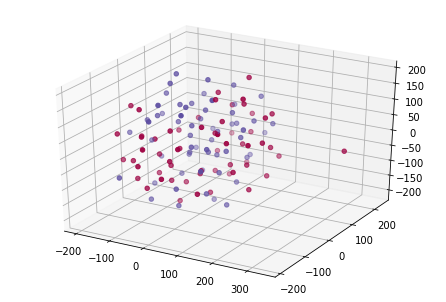

In [73]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(projected4[:, 0], projected4[:, 1], projected4[:, 2], c=labels, cmap=plt.cm.get_cmap('Spectral', 10))



## Mpi4Py Helloworld

In [6]:
from mpi4py import MPI
import sys

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

print("Hello World from rank {} of {}".format(rank,size))

sys.exit()

Hello World from rank 0 of 1


SystemExit: 

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
